# 2.03 Distributions Lab

**NOTE**: Double-click on the cells that say "Type _Markdown_ and LaTeX: $\alpha^2$" to open a Markdown cell in which you can enter text without needing to put comments in code cells!

#### 1. Define distribution.

The relative number of times each possible outcome will occur given a particular number of 'trials'

#### 2. When summarizing the distribution of a variable, what are the three aspects of distributions we want to make sure we summarize?

Mean, standard deviation, number of observations

#### 3. What is a Bernoulli random variable?

A variable that takes 1 with probability 'p' and 0 with probability '1 - p' for a single event. It is like a boolean. 

#### 4. What is the relationship between the Bernoulli and Binomial distributions?

The bernouli distribution is a special case of the binomial distribution where only 1 trial is conducted (or alternatively, an infinite amount of trials occur that converge at the 'true' probability of occurrence/success). A binomial distribution is the discrete probability distribution of the # of successful trials out of 'n' trials. (i.e. what is the likelihood of 0 successful trials out of 20 trials, 1 out of 20, 2 out of 20, etc. etc.) 

#### 5. What is the relationship between the Binomial and Poisson distributions?

The Poisson distribution is like a binomial distribution, in that it is a discrete probability distribution for each possible outcome, but taking into account a fixed time interval. 

#### 6. What is the relationship between the Exponential and Geometric distributions?

Where the Geometric distribution measures the number of trials until a success, the Exponential distribution measures the time until a success.

#### 7. Let's walk through the Central Limit Theorem.

a) Let's create a population of 10,000 observations from a Normal distribution with mean 500 and standard deviation 100. Save this as `population`. Before this step, however, set your seed to 45 using using `random.seed(45)`.

In [5]:
import numpy as np
np.random.seed(45)
population = list(np.random.normal(500, 100, 10000))

b) Generate 1,000 random samples of size 5 from `population`. Calculate the mean of each of these samples (so you should have 1,000 means) and put them in a list `norm_samples_5`.

In [9]:
import random 
def sampler(lst, size):
    empty = []
    for num in range(1000):
        p = np.mean(random.sample(lst, size))
        empty.append(p)
    return empty

norm_samples_5 = sampler(population, 5)

We simulated the sampling distribution of $\bar{X}$ when we took the mean of 1,000 samples from the population. This isn't exactly what the sampling distribution of $\bar{X}$ is, but it's close enough for our purposes! 

(In general, we'd actually take every possible sample of size 5 from our population, but that can get really complicated.)

c) Plot `norm_samples_5` **with** a kernel density estimate using `seaborn.distplot`.

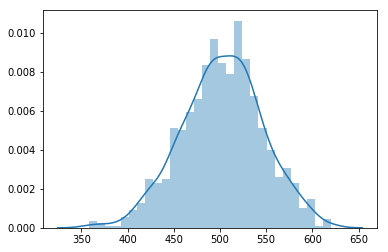

In [11]:
import seaborn as sns
%matplotlib inline
sns.distplot(norm_samples_5, bins=30, kde=True)

d) How would you describe the shape of the distribution from c)?

It looks a lot like a bell curve. 

e) Generate 1,000 random samples of size 50 from `population`. Calculate the mean of each of these samples (so you should have 1,000 means) and put them in a list `norm_samples_50`.

In [12]:
norm_samples_50 = sampler(population, 50)

f) Plot `norm_samples_50` **with** a kernel density estimate using `seaborn.distplot`.

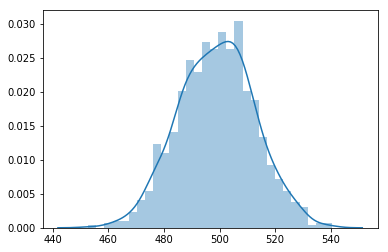

In [13]:
sns.distplot(norm_samples_50, bins=30, kde=True)

g) How would you describe the shape of the distribution from f), relative to the distribution you generated for part c)?

It is a slightly better bell curve. 

h) Run this command:

```python
random.seed(46)
population_2 = [np.random.choice([np.random.poisson(2),np.random.poisson(10),np.random.exponential(5)]) for i in range(10000)]

```

In [34]:
random.seed(46)
population_2 = [np.random.choice([np.random.poisson(2),np.random.poisson(10),np.random.exponential(5)]) for i in range(10000)]

[2.0,
 3.4693769045449696,
 1.6974349455675917,
 13.720560200908192,
 7.5726304070141559]

i) What is the command in h) doing?

It is randomly choosing a number (either from two poisson distributions with means 2 and 10 or an exponential distribution with mean 5) 10,000 times and recording this numbers in a list.

j) Is the population created in `population_2` Normally distributed? How do you know?

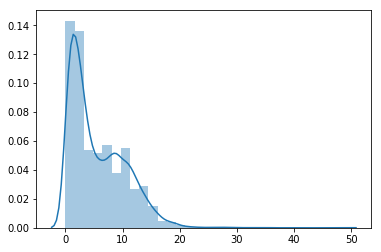

In [35]:
sns.distplot(population_2, bins=30, kde=True)

It isn't normally distributed. Firstly it is drawing from 'samples' with different means and you can also just look at a distribution plot (like above) to see that it is skewed. 

k) Generate 1,000 random samples of size 5 from `population_2`. Calculate the mean of each of these samples (so you should have 1,000 means) and put them in a list `poiexp_samples_5`.

In [36]:
poiexp_samples_5 = sampler(population_2, 5)

l) Plot `poiexp_samples_5` **with** a kernel density estimate using `seaborn.distplot`.

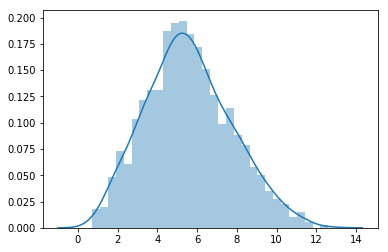

In [37]:
sns.distplot(poiexp_samples_5, bins=30, kde=True)

m) How would you describe the shape of the distribution from l)?

Approaching normality. 

n) Generate 1,000 random samples of size 50 from `population_2`. Calculate the mean of each of these samples (so you should have 1,000 means) and put them in a list `poiexp_samples_50`.

In [38]:
poiexp_samples_50 = sampler(population_2, 50)

o) Plot `poiexp_samples_50` with a kernel density estimate using seaborn.distplot.

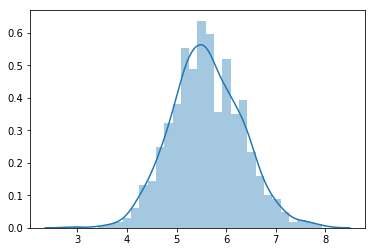

In [39]:
sns.distplot(poiexp_samples_50, bins=30, kde=True)

p) How would you describe the shape of the distribution from o)?

It is slightly better than the 5 sample, the distribution is more closely distributed around the mean. 

**You just observed the Central Limit Theorem. Let's make this a bit more explicit.**

q) When our original data came from a Normal distribution (`population`) and we looked at the sampling distribution of $\bar{X}$ for $n=5$ (`norm_samples_5`), what was the shape of the sampling distribution of $\bar{X}$?

Close to bell curve, drawn from normal distribution, so as it should be. 

r) When our original data came from a Normal distribution (`population`) and we looked at the sampling distribution of $\bar{X}$ for $n=50$ (`norm_samples_50`), what was the shape of the sampling distribution of $\bar{X}$?

Even closer to perfect bell curve, each individual sample more likely to approach mean with less room for fluctuation. 

s) So, if our original population is a Normal distribution, what will the sampling distribution be shaped like - regardless of sample size?

Like a bell curve

t) When our original data came from a non-Normal distribution (`population_2`) and we looked at the sampling distribution of $\bar{X}$ for $n=5$ (`poiexp_samples_5`), what was the shape of the sampling distribution of $\bar{X}$?

Approaching bell curve w/ small positive skew.

u) When our original data came from a non-Normal distribution (`population_2`) and we looked at the sampling distribution of $\bar{X}$ for $n=50$ (`poiexp_samples_50`), what was the shape of the sampling distribution of $\bar{X}$?

Very close to bell curve. 

v) So, if our original population is not a Normal distribution, what will the sampling distribution be shaped like when $n$ is small (like 5)?

Close to bell curve, but slight problems.

w) So, if our original population is not a Normal distribution, what will the sampling distribution be shaped like when $n$ is large (like 50)?

Very close to bell curve.

x) When you sample from a non-Normal distribution, what happens to our sampling distribution of $\bar{X}$ as we increase $n$?

It moves closer to normal/bell curve.

BONUS: If you're so inclined, repeat steps k and l for sample size $n=10, 20, 30, 50, 100$ to look at this phenomenon more closely! You could write a loop to do this.

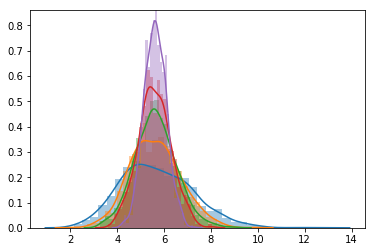

In [49]:
import matplotlib.pyplot as plt
sample_n = [10, 20, 30, 50, 100]
for x in sample_n:
    poiexp_samples_end = sampler(population_2, x)
    sns.distplot(poiexp_samples_end, bins=30, kde=True)